In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [25]:
housing = pd.read_csv('./Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [26]:
#encoding
bin_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
is_bin_vars_encoded = False

In [27]:
if not is_bin_vars_encoded:
    housing[bin_vars] = housing[bin_vars].apply(lambda x: x.str.lower().map({'yes': 1, 'no': 0}))
    is_bin_vars_encoded= True

housing[bin_vars].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


In [28]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [23]:
# get dummy values

In [29]:
furnishingstatus_dummy = pd.get_dummies(housing['furnishingstatus']) # pass Series instead of dataframe
furnishingstatus_dummy.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [32]:
# Let's drop the first column from status df using 'drop_first = True'
furnishingstatus_dummy = pd.get_dummies(housing['furnishingstatus'], drop_first = True)

# Add the results to the original housing dataframe
housing = pd.concat([housing, furnishingstatus_dummy], axis = 1)

# Now let's see the head of our dataframe.
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [36]:
if 'furnishingstatus' in housing.columns:
    housing = housing.drop('furnishingstatus', axis=1)
    
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [39]:
# split data in train and test set
from sklearn.model_selection import train_test_split

In [40]:
df_train, df_test = train_test_split(housing, train_size=0.7, random_state=100)

In [41]:
print(df_train.shape)
print(df_test.shape)

(381, 14)
(164, 14)


In [42]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,0,1
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0
159,5460000,3150,3,2,1,1,1,1,0,1,0,0,0,0
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,0,0
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,0,1


### 1. Scaling should be done after the test-train split
- **Feedback:**
Correct! Scaling should always be done after the test-train split since you don't want the test dataset to learn anything from the train data. So if you're performing the test-train split earlier, the test data will then have information regarding the data like the minimum and maximum values, etc.

### 2. Standardised scaling will affect the values of dummy variables but MinMax scaling will not
- **Feedback:**
MinMax scaling scales in such a way that all the values lie between 0 and 1 using the formula:

 **(X-Xmin)/(Xmax-Xmin)**

So if you have dummy variables, which can only take the values 0 and 1, you can notice that for the case of zero, the variable remains zero and for the case of 1, the variable remains 1.

On the other hand, the standard scaler scales in such a way that the mean of the dataset becomes zero and standard deviation becomes one. So this will clearly distort the values of the dummy variables since some of the variables will become negative.

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

scaler = MinMaxScaler()

if(scaler):
    df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train[num_vars].head()

,price,area,bedrooms,bathrooms,stories,parking
359,0.169697,0.155227,0.4,0.0,0.000000,0.333333
19,0.615152,0.403379,0.4,0.5,0.333333,0.333333
159,0.321212,0.115628,0.4,0.5,0.000000,0.000000
35,0.548133,0.454417,0.4,0.5,1.000000,0.666667
28,0.575758,0.538015,0.8,0.5,0.333333,0.666667


In [45]:
print(scaler.data_min_)
print(scaler.data_max_)

[1.750e+06 1.836e+03 1.000e+00 1.000e+00 1.000e+00 0.000e+00]
[1.33e+07 1.32e+04 6.00e+00 3.00e+00 4.00e+00 3.00e+00]


In [47]:
df_train[num_vars].describe()

,price,area,bedrooms,bathrooms,stories,parking
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.242345
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.285933
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
#split data into X and y training set
y_train_price = df_train.pop('price')
X_train = df_train

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [63]:
lr_model_1 = LinearRegression()
lr_model_1.fit(X_train, y_train_price)

# running RFE
rfe = RFE(estimator=lr_model_1, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train_price)

In [64]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

In [65]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

In [66]:
X_train.columns[~rfe.support_]


Index(['basement', 'semi-furnished', 'unfurnished'], dtype='object')

In [68]:
import statsmodels.api as sm

In [69]:
# inculde only top 10 features
X_train_rfe = X_train[col]
X_train_rfe_sm = sm.add_constant(X_train_rfe)

lr_model_2 = sm.OLS(y_train_price, X_train_rfe_sm).fit()

In [70]:
print(lr_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     74.89
Date:                Sun, 21 May 2023   Prob (F-statistic):           1.28e-82
Time:                        21:38:32   Log-Likelihood:                 374.65
No. Observations:                 381   AIC:                            -727.3
Df Residuals:                     370   BIC:                            -683.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0027      0.018     

In [71]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bedrooms,5.85
4,mainroad,5.53
0,area,4.66
3,stories,2.45
8,parking,2.11
7,airconditioning,1.75
2,bathrooms,1.64
9,prefarea,1.47
5,guestroom,1.30
6,hotwaterheating,1.13


In [73]:
X_train_rfe.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0.333333,0
19,0.403379,0.4,0.5,0.333333,1,0,0,1,0.333333,1
159,0.115628,0.4,0.5,0.000000,1,1,0,1,0.000000,0
35,0.454417,0.4,0.5,1.000000,1,0,0,1,0.666667,0
28,0.538015,0.8,0.5,0.333333,1,0,1,0,0.666667,0


In [74]:
# drop bedrooms
X_train_new = X_train_rfe.drop(['bedrooms'], axis=1)

X_train_new_sm = sm.add_constant(X_train_new)

lr_model_3 = sm.OLS(y_train_price, X_train_new_sm).fit()

In [75]:
print(lr_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     82.37
Date:                Sun, 21 May 2023   Prob (F-statistic):           6.67e-83
Time:                        21:44:00   Log-Likelihood:                 373.00
No. Observations:                 381   AIC:                            -726.0
Df Residuals:                     371   BIC:                            -686.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0242      0.013     

In [76]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,area,4.52
3,mainroad,4.26
2,stories,2.12
7,parking,2.10
6,airconditioning,1.75
1,bathrooms,1.58
8,prefarea,1.47
4,guestroom,1.30
5,hotwaterheating,1.12


In [78]:
y_train_price_pred = lr_model_3.predict(X_train_new_sm)
y_train_price_pred.head()

359    0.136896
19     0.471955
159    0.318751
35     0.514123
28     0.481968
dtype: float64

In [79]:
train_res = y_train_price - y_train_price_pred
train_res.head()

359    0.032801
19     0.143196
159    0.002461
35     0.034010
28     0.093790
dtype: float64

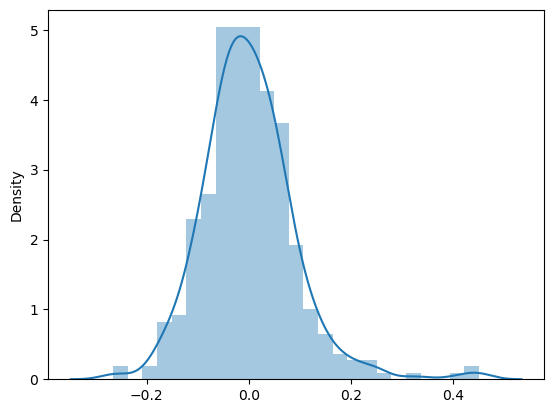

In [80]:
sns.distplot(train_res)
plt.show()

In [81]:
# predication on test set
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,1,0
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,1,0
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,1,0
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,1,0
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,1,0


In [82]:
# scalling

num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

if(scaler):
    df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test[num_vars].head()

,price,area,bedrooms,bathrooms,stories,parking
265,0.229697,0.091869,0.4,0.0,0.333333,0.000000
54,0.484848,0.366420,0.4,0.5,0.333333,0.333333
171,0.303030,0.742080,0.4,0.0,0.000000,0.333333
244,0.242424,0.306582,0.4,0.0,0.333333,0.000000
268,0.227879,0.274023,0.6,0.0,0.333333,0.000000


In [84]:
df_test[num_vars].describe()

,price,area,bedrooms,bathrooms,stories,parking
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.205285
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.289322
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,0.333333
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000


In [85]:
y_test_price = df_test.pop('price')
X_test = df_test

In [86]:
X_train_new.columns

Index(['area', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

In [87]:
# final features included for model building
X_test = X_test[X_train_new.columns]

In [89]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_sm = sm.add_constant(X_test)

y_test_price_pred = lr_model_3.predict(X_test_sm)

In [90]:
test_res = y_test_price - y_test_price_pred
test_res.head()

265    0.028300
54     0.047921
171   -0.038024
244   -0.048771
268   -0.022401
dtype: float64

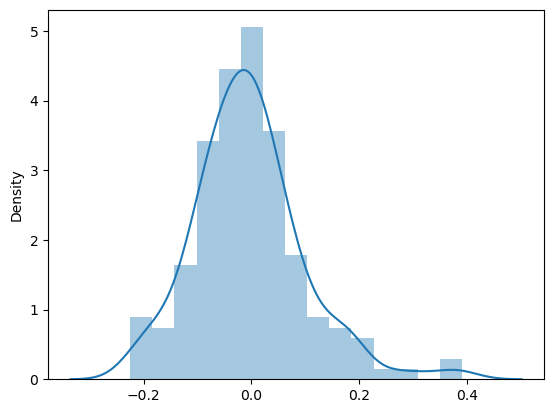

In [91]:
sns.distplot(test_res)
plt.show()

Text(0, 0.5, 'y_test_price_pred')

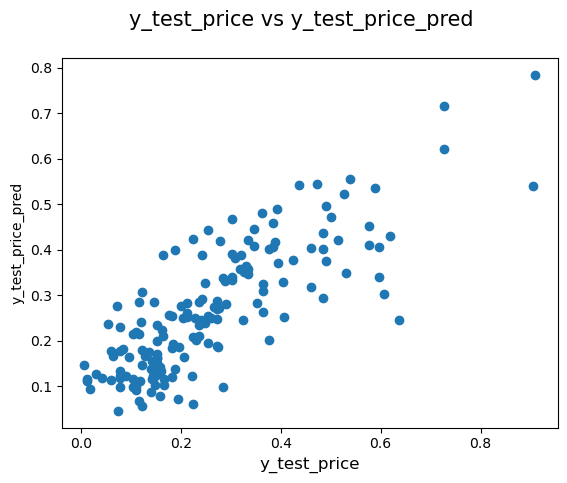

In [92]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test_price, y_test_price_pred)
fig.suptitle('y_test_price vs y_test_price_pred', fontsize=15)              # Plot heading 
plt.xlabel('y_test_price', fontsize=12)                          # X-label
plt.ylabel('y_test_price_pred', fontsize=10)                          # Y-label

### 1. The mean of residuals is always equal to zero
  - **Feedback** - When a model gives you a “best fit” line, by design it is made such that the mean of all residuals is always zero.
    
### 2.  The sum of residuals is always equal to zero.  
  - **Feedback** - When a model gives you a “best fit” line, by design it is made such that the sum of all residuals is always zero.
    

In [95]:
# 1. The mean of residuals is always equal to zero
  # Feedback - When a model gives you a “best fit” line, by design it is made such that the mean of all residuals is always zero.
    
#2.  The sum of residuals is always equal to zero.  
  # Feedback - When a model gives you a “best fit” line, by design it is made such that the sum of all residuals is always zero.
    
print('.....Mean....')
print(res.mean())
print(test_res.mean())

print()
print('.....Median....')
print(res.median())
print(test_res.median())

print()
print('.....Sum....')
print(res.sum())
print(test_res.sum())

-5.296142643717118e-17
-0.005157604527118583
-0.005565755367354208
-0.012218302489587982
